In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_dataset_1(num_samples=40):
    np.random.seed(40)
    # Generate data
    x1 = np.random.uniform(-20, 20, num_samples)
    f_x = 100 * x1 + 1
    eps = np.random.randn(num_samples)
    y = f_x + eps
    return x1, y

In [3]:
def generate_dataset_2(num_samples=40):
    np.random.seed(45)
    # Generate data
    x1 = np.random.uniform(-1, 1, num_samples)
    f_x = 3 * x1 + 4
    eps = np.random.randn(num_samples)
    y = f_x + eps
    return x1, y

In [4]:
def f(x,y,X,Y):
  result=0.0
  for idx,i in enumerate(X):
    result=result+(Y[idx][0]-(x+y*X[idx][1]))**2
  return result/len(Y)
# def f(x, y):
#     return (14 + 3*x**2 +14*y**2 -12*x - 28*y + 12*x*y)/3

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import torch

def create_XYZ(f,X_,y_):
    # Generate data
    x = np.linspace(0,110, 100)
    y = np.linspace(0,110, 100)
    X, Y = np.meshgrid(x, y)

    # Convert to PyTorch tensors
    X_torch = torch.from_numpy(X)
    Y_torch = torch.from_numpy(Y)

    # Evaluate the function

    Z = f(X_torch, Y_torch,X_,y_)
    #Z = f(X_torch, Y_torch)
    return X, Y, Z, X_torch, Y_torch

def create_contour(X, Y, Z, ax2, alpha, scatter_pts=None, filled=True, levels=10, mark_levels=False):
    if filled:
        scatter_color='white'
        contour = ax2.contourf(X, Y, Z.detach().numpy(), levels=levels, cmap='magma', alpha=alpha)
    else:
        scatter_color='black'
        contour = ax2.contour(X, Y, Z.detach().numpy(), levels=levels, cmap='magma', alpha=alpha)
    if scatter_pts is not None:
        ax2.scatter(scatter_pts[0], scatter_pts[1], s=10, c=scatter_color)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Contour Plot')


    # Add a colorbar in between the subplots
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(contour, cax=cax)
    return ax2, contour

def plot_surface_and_contour(f, function_name, uv = None, stride=4, alpha=1, scatter_pts=None, filled=True, levels=10):
    X, Y, Z, X_torch, Y_torch = create_XYZ(f)

    # Create the single figure with two subplots
    fig = plt.figure()

    # Plot the 3D surface on the first subplot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X, Y, Z.detach().numpy(), cmap='magma', edgecolor='none', alpha=alpha)  # Remove grid lines
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    ax1.grid(False)
    ax1.xaxis.pane.fill = False
    ax1.yaxis.pane.fill = False
    ax1.zaxis.pane.fill = False
    ax1.view_init(elev=30, azim=30)
    ax1.set_title('Surface Plot')
    if scatter_pts is not None:
        ax1.scatter(scatter_pts[0], scatter_pts[1], f(scatter_pts[0], scatter_pts[1]), s=100, c='black')


    # Plot the contour plot on the second subplot
    ax2 = fig.add_subplot(122, aspect='equal')  # Set 1:1 aspect ratio

    ax2, contour = create_contour(X, Y, Z, ax2, alpha, scatter_pts, filled, levels)
    file_name = f"../figures/mml/contour-{function_name}.pdf"
    if uv is not None:
        u = uv[0](X_torch, Y_torch)
        v = uv[1](X_torch, Y_torch)
        # Quiver plot for gradient
        ax2.quiver(X[::stride, ::stride], Y[::stride, ::stride], u[::stride, ::stride].detach().numpy(),
                   v[::stride, ::stride].detach().numpy(), scale=140)
        # for c in contour, set alpha
        for c in contour.collections:
            c.set_alpha(0.5)
        file_name = f"../figures/mml/contour-{function_name}-with-gradient.pdf"



    # Save the figure
    plt.tight_layout(pad=1.0, w_pad=1.0)
    fig.savefig(file_name, bbox_inches="tight")

# Example usage:
# Define your function f(x, y) and its gradient g(x, y)
#f = lambda x, y: x**2 + y**2
#g = lambda x, y: (2*x, 2*y)
#plot_surface_and_contour(f, "x_squared_plus_y_squared", uv=(lambda x, y: 2*x, lambda x, y: 2*y))

tensor([[1157352.8408, 1157305.1458, 1157259.9200,  ..., 1164222.7240,
         1164414.5352, 1164608.8155],
        [1131779.7120, 1131732.5358, 1131687.8288,  ..., 1138699.9195,
         1138892.2495, 1139087.0486],
        [1106492.2837, 1106445.6263, 1106401.4381,  ..., 1113462.8155,
         1113655.6643, 1113850.9822],
        ...,
        [   6981.0314,    6983.6607,    6988.7592,  ...,   18732.3692,
           18974.5046,   19219.1093],
        [   9120.8544,    9124.0025,    9129.6197,  ...,   20922.5164,
           21165.1707,   21410.2941],
        [  11546.3779,   11550.0448,   11556.1808,  ...,   23398.3642,
           23641.5373,   23887.1795]], dtype=torch.float64)
Epoch 0, Loss: 1157352.840794627
[0.22018297] [115.72190583]
Epoch 20, Loss: 1.3130339631898686
[0.33943099] [100.01079319]
Epoch 40, Loss: 1.1637002749591159
[0.46051201] [100.0105714]
Epoch 60, Loss: 1.0637847186500202
[0.55955271] [100.01038999]
Epoch 80, Loss: 0.996933638288888
[0.64056509] [100.01024159]


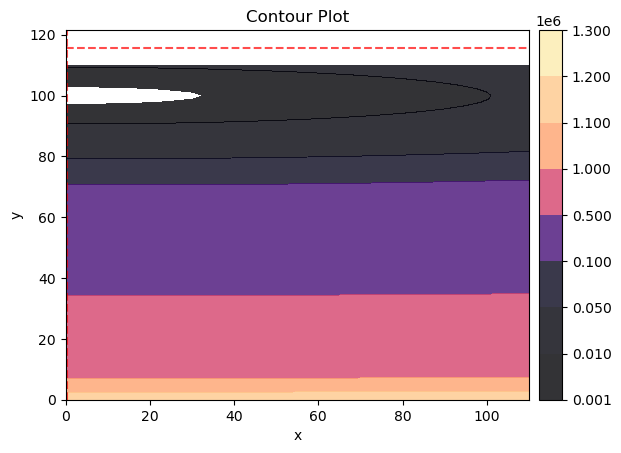

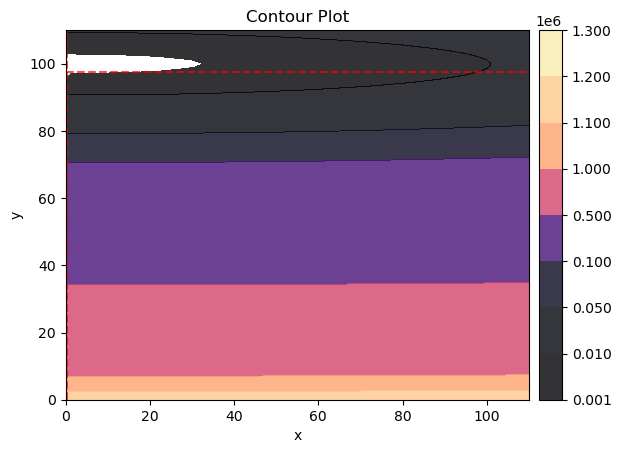

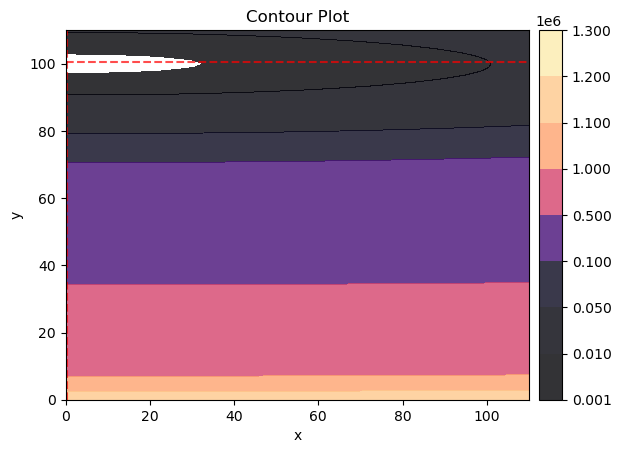

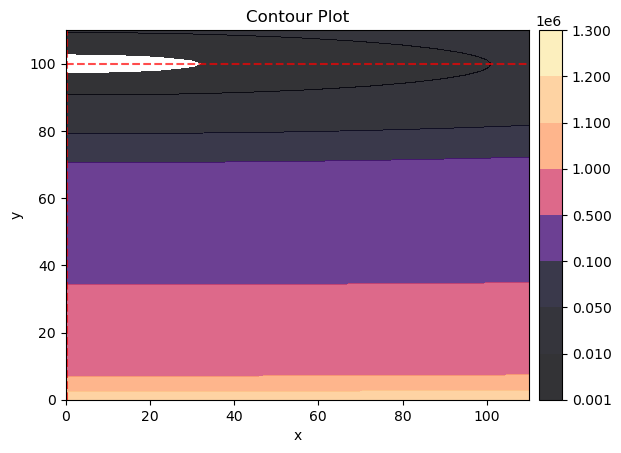

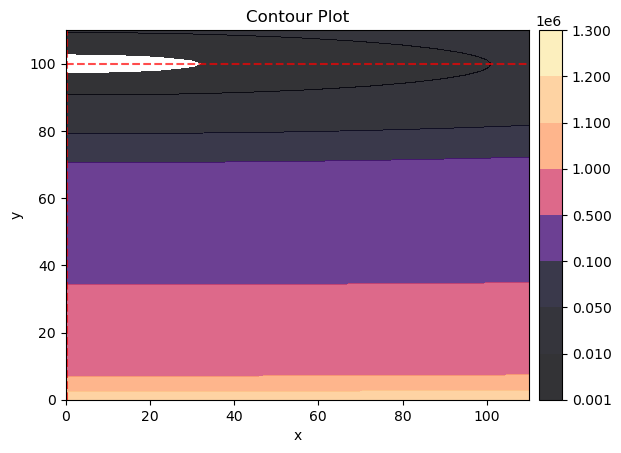

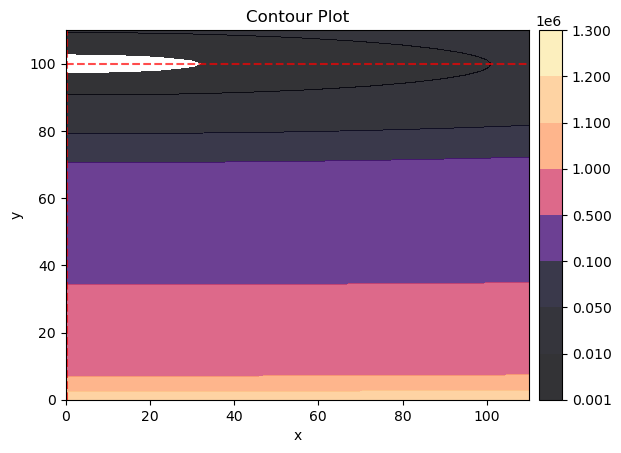

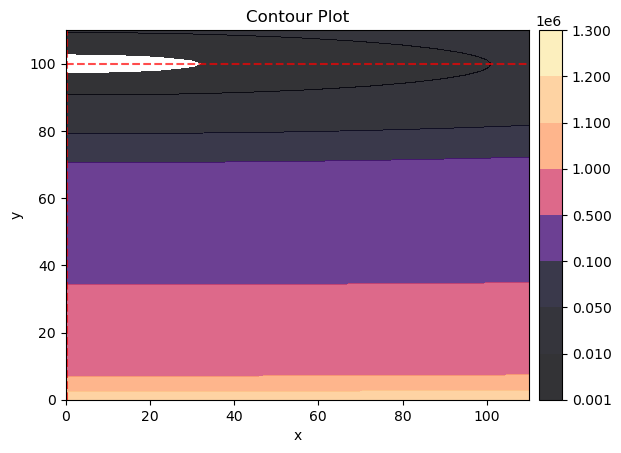

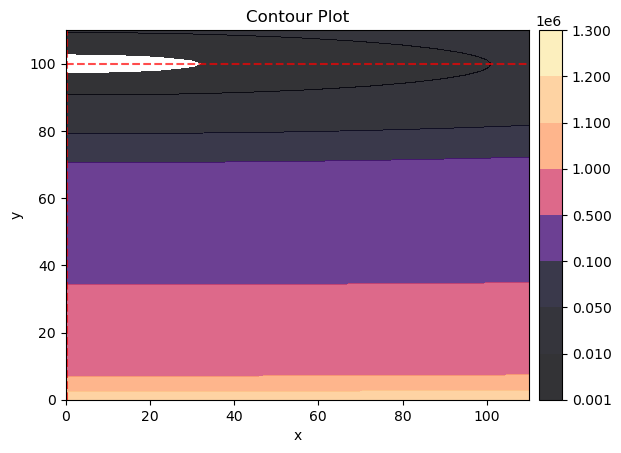

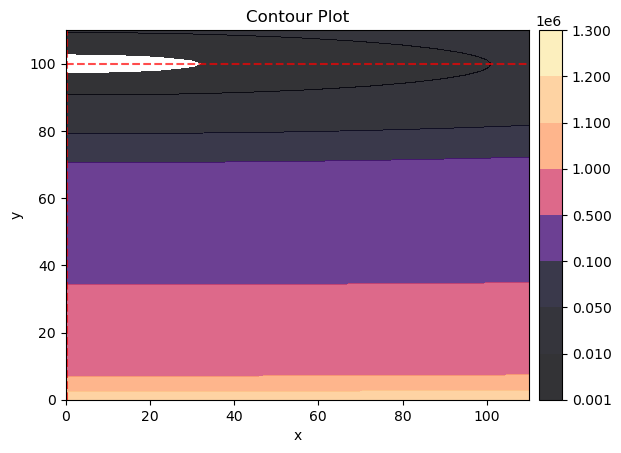

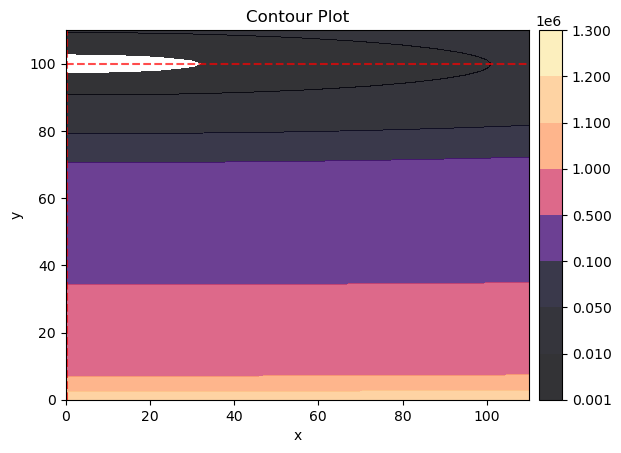

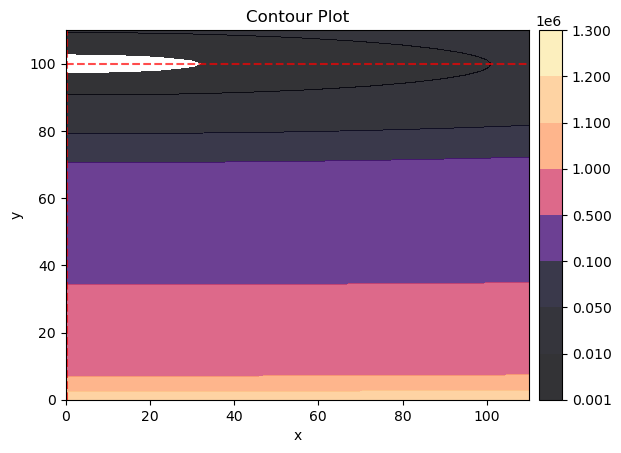

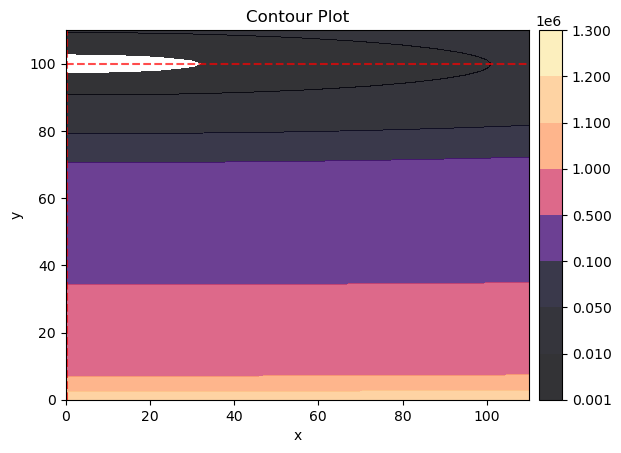

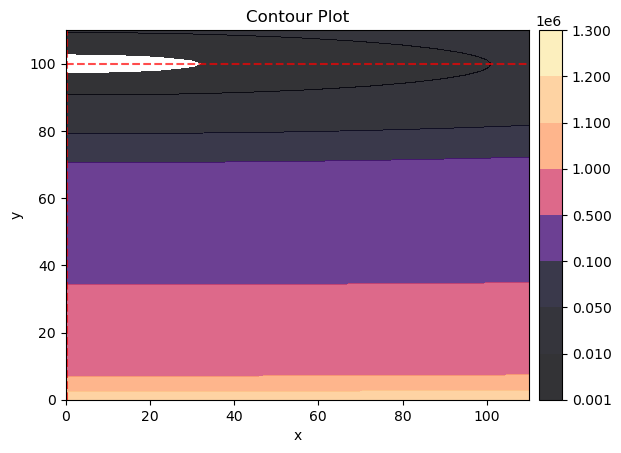

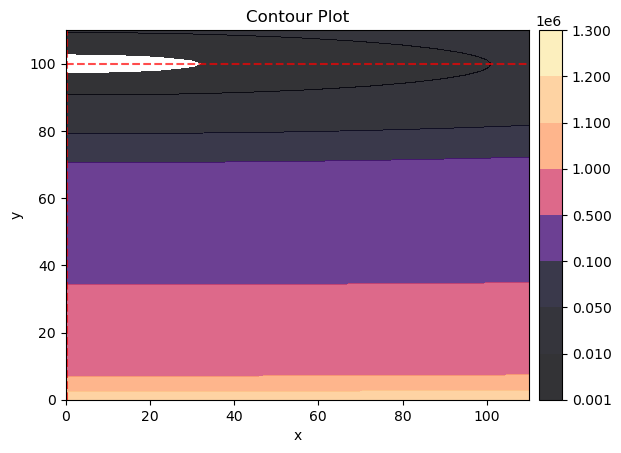

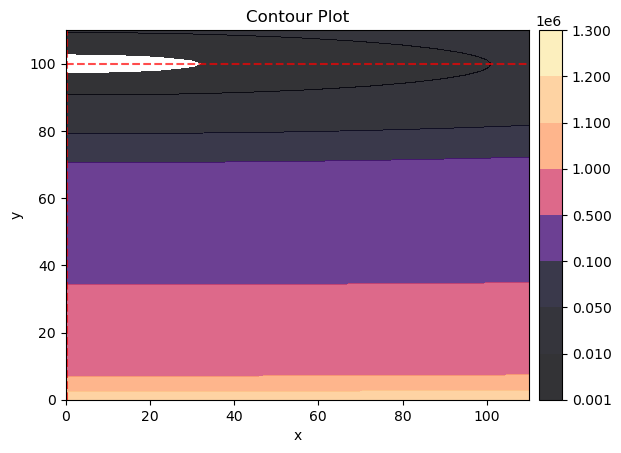

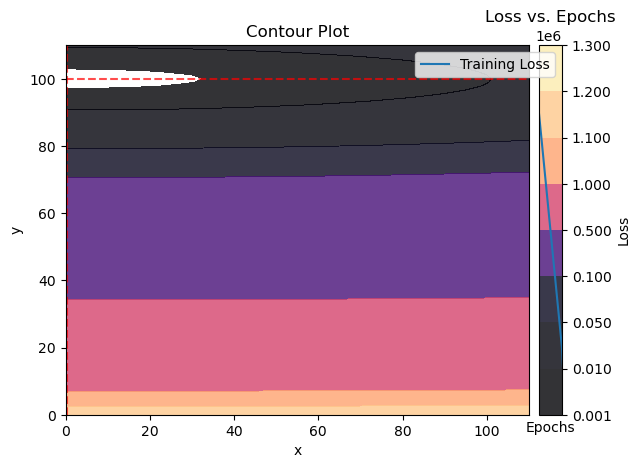

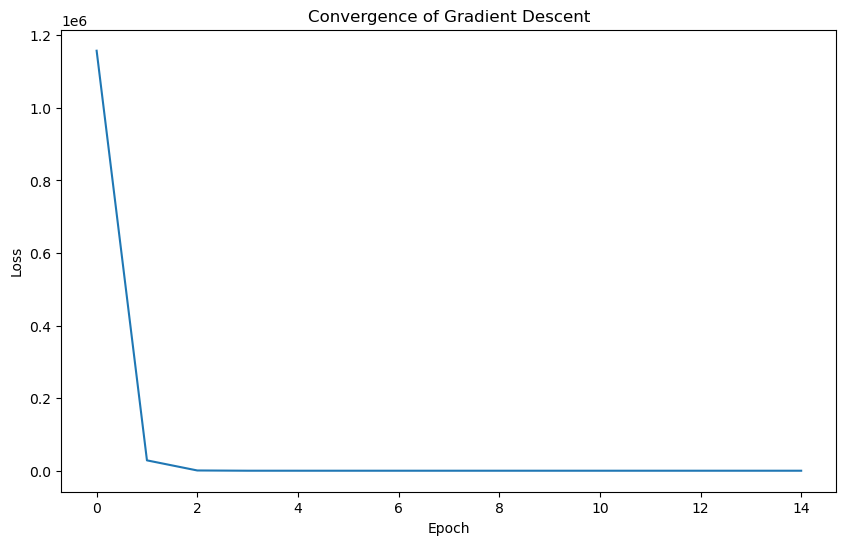

In [6]:

# Generate the dataset
#from latexify import latexify, format_axes
x, y = generate_dataset_1()
X_ = x.reshape(-1, 1)
X__=np.ones(X_.shape[0])
X__=X__.reshape(-1,1)
X=np.hstack((X__,X_))
y=y.reshape(-1,1)
# Initialize parameters (excluding bias)
theta = np.zeros(X.shape[1])  # Assuming X.shape[1] is the number of features
# Set hyperparameters
learning_rate = 0.01
epsilon = 0.001  # Convergence criteria
print_interval = 20

# Initialize an empty list to store loss values for plotting
loss_history = []

# Full-batch gradient descent until convergence
epoch = 0
#latexify(columns=2, fig_width=6.5, fig_height=3)
X1, Y, Z, X_torch, Y_torch = create_XYZ(f,X,y)
print(Z)
levels = [1000,10000,50000,100000,500000,1000000,1100000,1200000,1300000]
theta=theta.reshape(-1,1)
i=0
#prev_loss = float('inf')  # Initialize prev_loss to infinity
while True:
    predictions = np.dot(X, theta)
    loss = np.mean((predictions - y) ** 2)
    gradient_theta = np.dot(X.T, (predictions - y)) / len(y)
    theta -= learning_rate * gradient_theta
    if epoch<=15:
      fig, ax = plt.subplots(ncols=1)
      _, _ = create_contour(X1, Y, Z, ax, alpha=0.8, scatter_pts=(theta[0],theta[1]), filled=True, levels=levels)
      # Mark the minima with horizontal and vertical lines
      ax.axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
      ax.axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)
      #ax[0].scatter([0], [1], s=10, c='pink', marker='x', label
    # Append the current loss to the history list

    loss_history.append(loss)
    # Print the loss at every iteration
    if i%print_interval==0:
      print(f'Epoch {epoch}, Loss: {loss}')
      print(theta[0],theta[1])
    epoch += 1
    # Check for convergence
    if epoch != 1:
      if epoch > 0 and abs(loss - prev_loss) < epsilon:
          print(f'Converged at epoch {epoch}, Loss: {loss}')
          break
    # Update previous loss for the next iteration
    prev_loss = loss
    i=i+1

# Plotting the Loss vs. Epochs
plt.plot(range(epoch), loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Plotting the loss history for the first 15 iterations
plt.figure(figsize=(10, 6))
plt.plot(loss_history[:15])
plt.title('Convergence of Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# After training, you can use the learned parameters to make predictions
final_predictions = np.dot(X, theta)


In [7]:
def create_XYZ2(f,X_,y_):
    # Generate data
    x = np.linspace(-5,5,100)
    y = np.linspace(-5,5,100)
    X, Y = np.meshgrid(x, y)

    # Convert to PyTorch tensors
    X_torch = torch.from_numpy(X)
    Y_torch = torch.from_numpy(Y)

    # Evaluate the function

    Z = f(X_torch, Y_torch,X_,y_)
    #Z = f(X_torch, Y_torch)
    return X, Y, Z, X_torch, Y_torch

tensor([[87.7048, 86.0382, 84.3921,  ..., 21.0573, 21.3701, 21.7033],
        [87.3710, 85.7027, 84.0548,  ..., 20.5558, 20.8669, 21.1984],
        [87.0436, 85.3736, 83.7239,  ..., 20.0608, 20.3702, 20.6999],
        ...,
        [85.3317, 83.4975, 81.6837,  ...,  2.4235,  2.5687,  2.7343],
        [85.6230, 83.7871, 81.9716,  ...,  2.5473,  2.6907,  2.8546],
        [85.9208, 84.0832, 82.2659,  ...,  2.6774,  2.8191,  2.9813]],
       dtype=torch.float64)
Epoch 0, Loss: 16.68148600324362
[0.03723527] [0.00512651]
Epoch 50, Loss: 7.550330121287535
[1.49820729] [0.2744825]
Epoch 100, Loss: 3.9454348147407052
[2.39128662] [0.54960531]
Epoch 150, Loss: 2.420700674836438
[2.94061996] [0.81216721]
Epoch 200, Loss: 1.707178108706843
[3.28138921] [1.0534118]
Epoch 250, Loss: 1.3299993233525105
[3.49519274] [1.27002064]
Epoch 300, Loss: 1.1059493855084541
[3.63134545] [1.4616713]
Epoch 350, Loss: 0.9604126299323232
[3.71970318] [1.62960692]
Epoch 400, Loss: 0.8602861464586941
[3.77838532] [1.

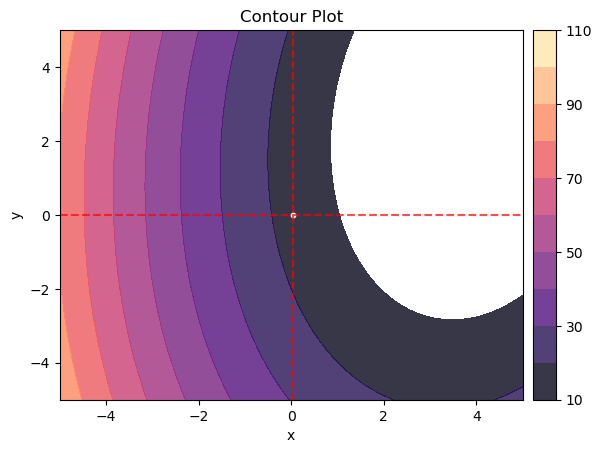

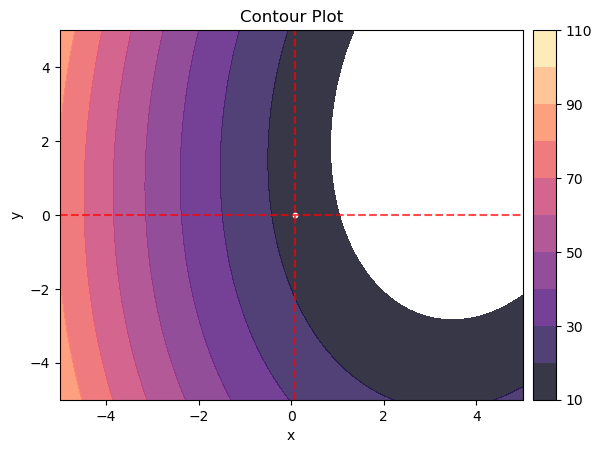

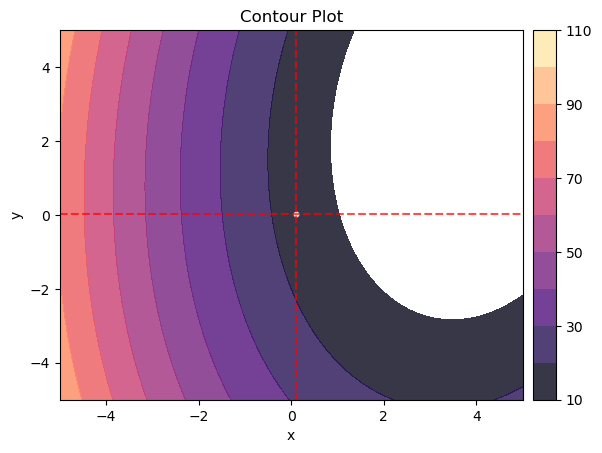

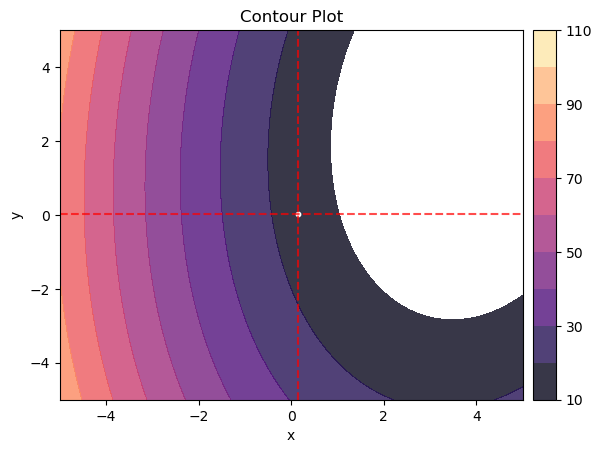

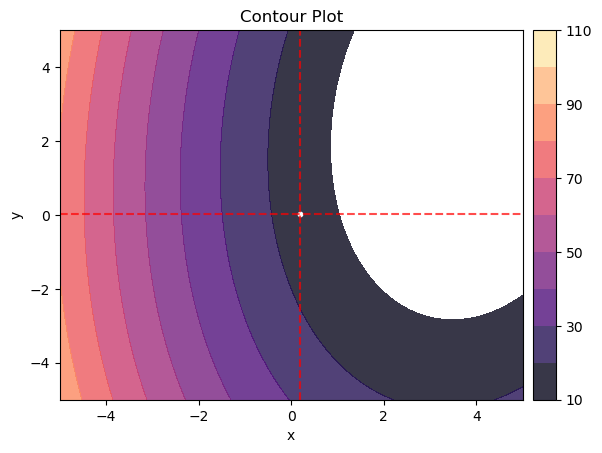

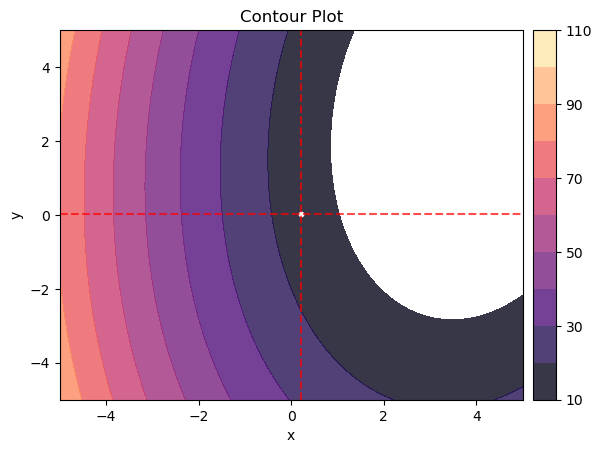

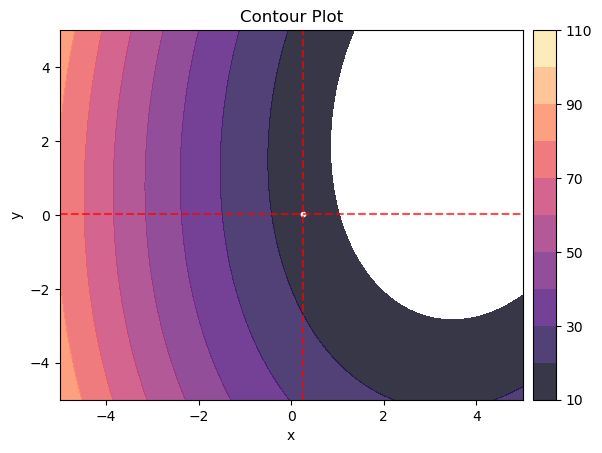

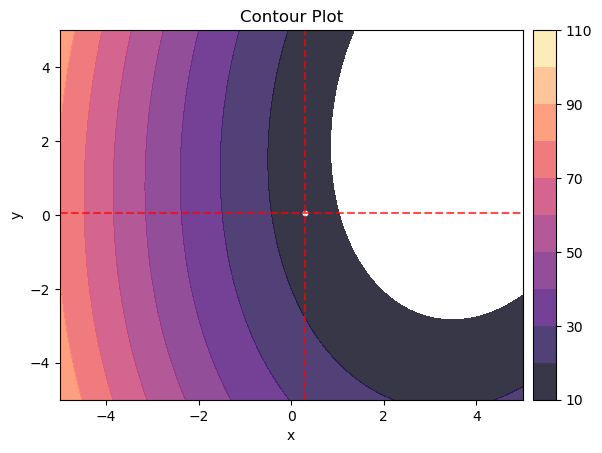

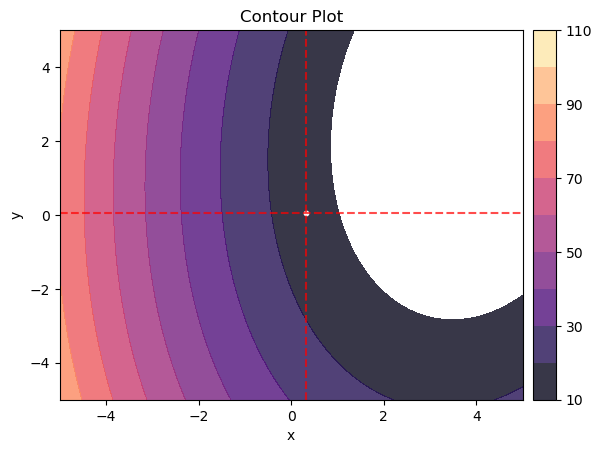

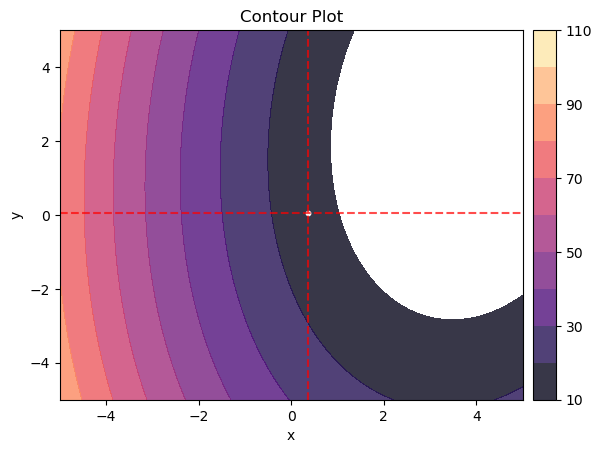

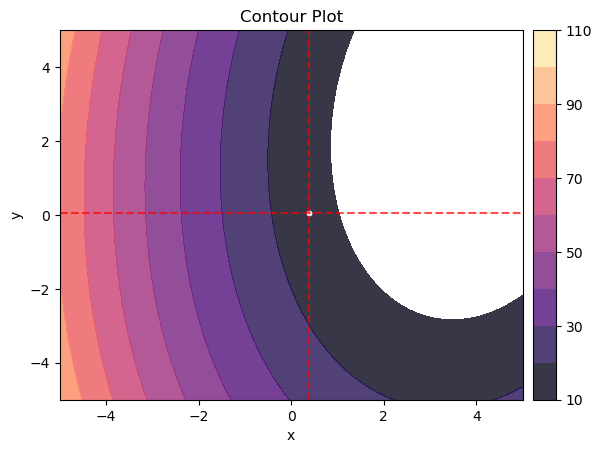

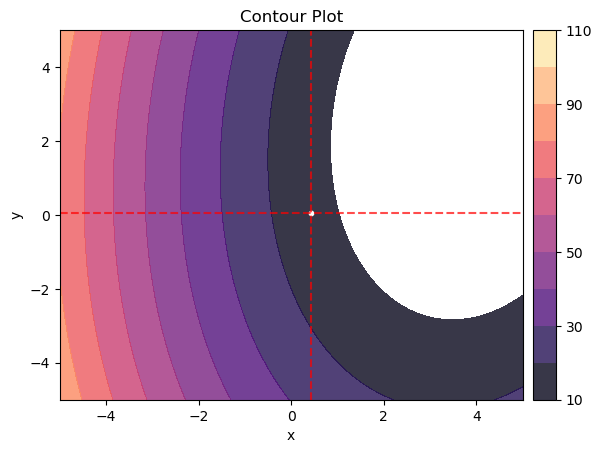

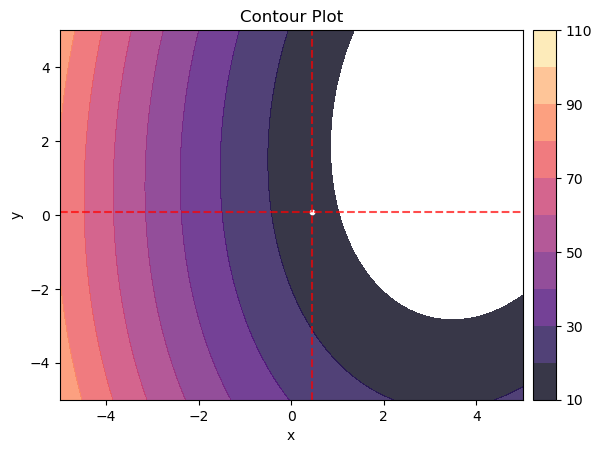

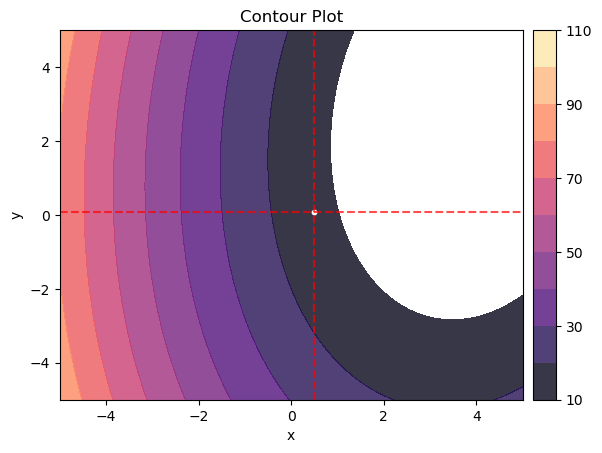

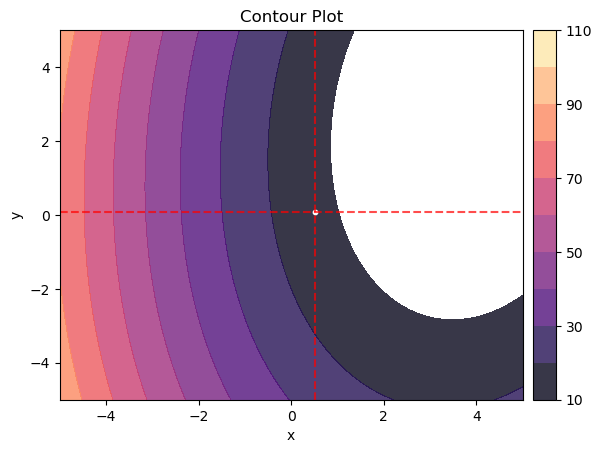

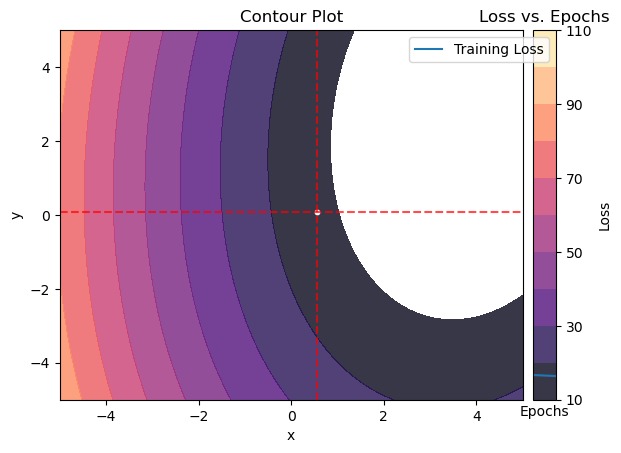

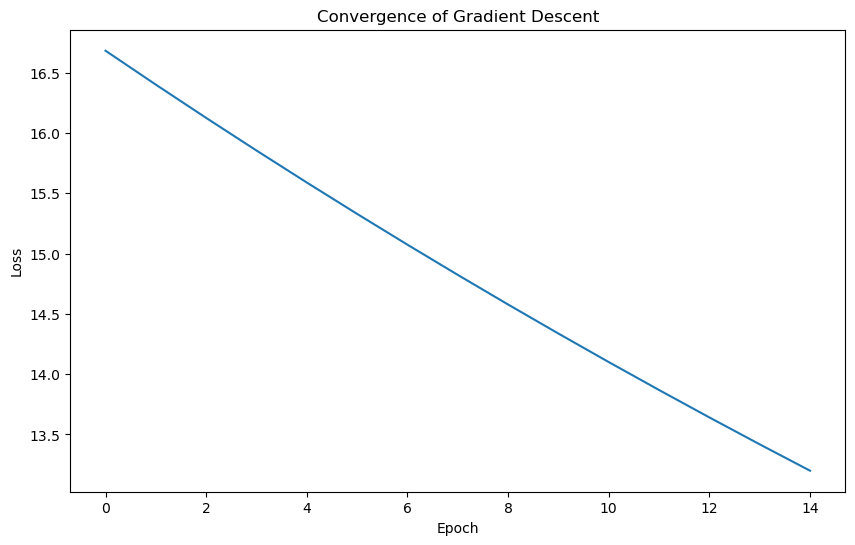

In [8]:
# Generate the dataset
x, y = generate_dataset_2()
X_ = x.reshape(-1, 1)
X__=np.ones(X_.shape[0])
X__=X__.reshape(-1,1)
X=np.hstack((X__,X_))
y=y.reshape(-1,1)
# Initialize parameters (excluding bias)
theta = np.zeros(X.shape[1])  # Assuming X.shape[1] is the number of features
# Set hyperparameters
learning_rate = 0.01
epsilon = 0.001  # Convergence criteria
print_interval = 50

# Initialize an empty list to store loss values for plotting
loss_history = []

# Full-batch gradient descent until convergence
epoch = 0
#latexify(columns=2, fig_width=6.5, fig_height=3)
X1, Y, Z, X_torch, Y_torch = create_XYZ2(f,X,y)
print(Z)
levels = [10,20,30,40,50,60,70,80,90,100,110]
theta=theta.reshape(-1,1)
i=0
#prev_loss = float('inf')  # Initialize prev_loss to infinity
while True:
    predictions = np.dot(X, theta)
    loss = np.mean((predictions - y) ** 2)
    gradient_theta = np.dot(X.T, (predictions - y)) / len(y)
    theta -= learning_rate * gradient_theta
    if epoch<=15:
      fig, ax = plt.subplots(ncols=1)
      _, _ = create_contour(X1, Y, Z, ax, alpha=0.8, scatter_pts=(theta[0],theta[1]), filled=True, levels=levels)
      # Mark the minima with horizontal and vertical lines
      ax.axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
      ax.axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)
      #ax[0].scatter([0], [1], s=10, c='pink', marker='x', label
    # Append the current loss to the history list

    loss_history.append(loss)
    # Print the loss at every iteration
    if i%print_interval==0:
      print(f'Epoch {epoch}, Loss: {loss}')
      print(theta[0],theta[1])
    epoch += 1
    # Check for convergence
    if epoch != 1:
      if epoch > 0 and abs(loss - prev_loss) < epsilon:
          print(f'Converged at epoch {epoch}, Loss: {loss}')
          break
    # Update previous loss for the next iteration
    prev_loss = loss
    i=i+1

# Plotting the Loss vs. Epochs
plt.plot(range(epoch), loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Plotting the loss history for the first 15 iterations
plt.figure(figsize=(10, 6))
plt.plot(loss_history[:15])
plt.title('Convergence of Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# After training, you can use the learned parameters to make predictions
final_predictions = np.dot(X, theta)


In [9]:
def f1(x, y,x1,y1):
    return (y1[0]-x-x1[1]*y)**2

def f2(x, y,x1,y1):
    return (y1[0]-x-x1[1]*y)**2

def f3(x, y,x1,y1):
    return (y1[0]-x-x1[1]*y)**2

In [10]:
def create_XYZ3(f,X_,y_):
    # Generate data
    x = np.linspace(-5,5,10)
    y = np.linspace(-5,5, 10)
    X, Y = np.meshgrid(x, y)

    # Convert to PyTorch tensors
    X_torch = torch.from_numpy(X)
    Y_torch = torch.from_numpy(Y)

    # Evaluate the function

    Z = f(X_torch, Y_torch,X_,y_)
    #Z = f(X_torch, Y_torch)
    return X, Y, Z, X_torch, Y_torch

[6.0030427]
Converged at iteration 10
Final Weights: [[3.9378896]
 [2.5108416]]


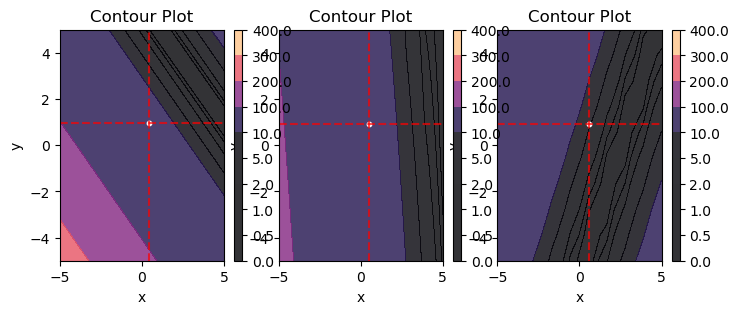

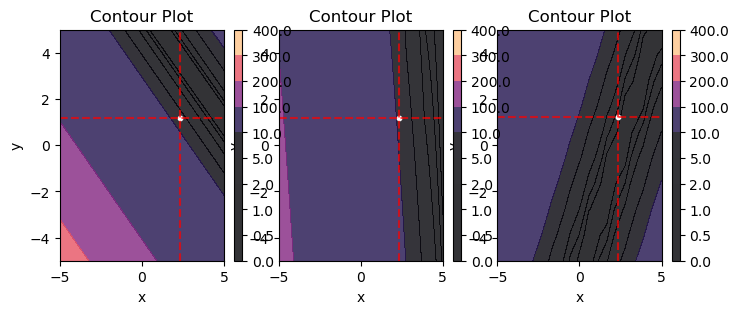

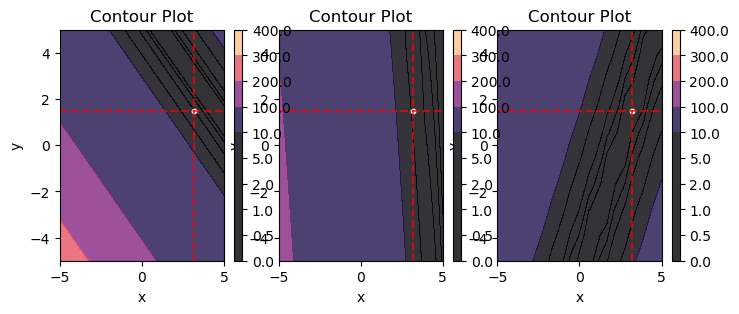

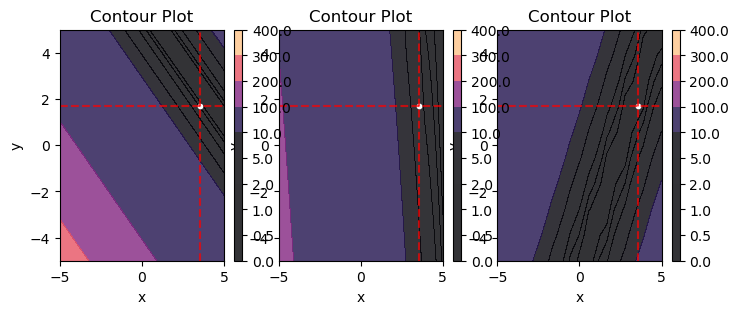

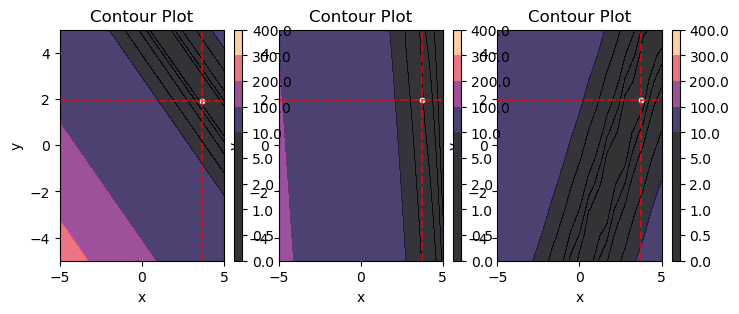

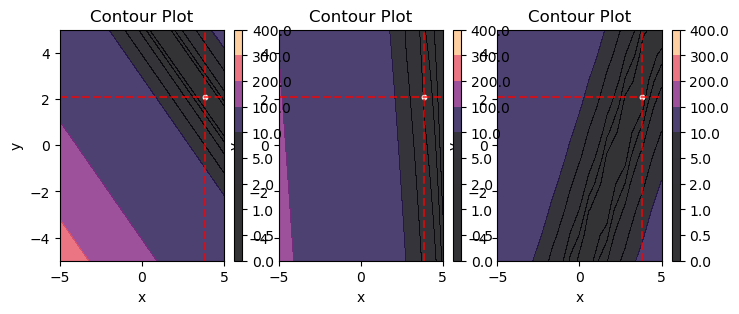

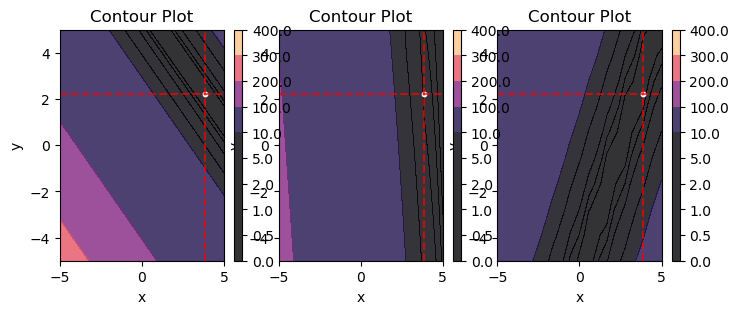

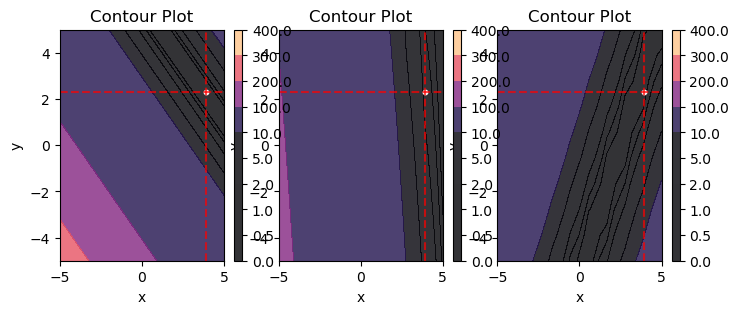

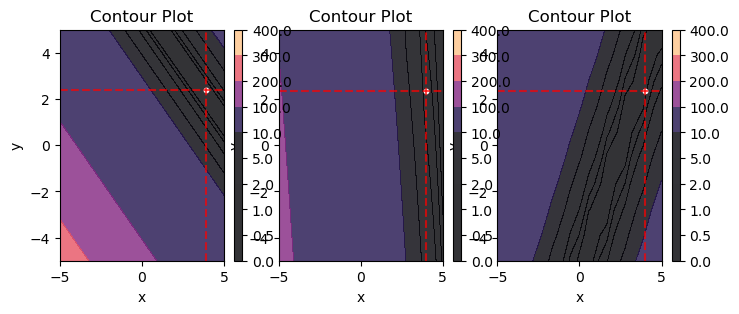

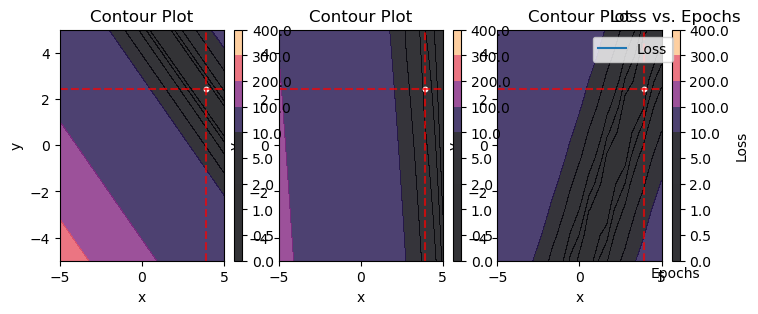

In [11]:

# Generate the dataset
x, y = generate_dataset_2()
X_ = x.reshape(-1, 1)
X__=np.ones(X_.shape[0])
X__=X__.reshape(-1,1)
X=np.hstack((X__,X_))
y=y.reshape(-1,1)

# Initialize weights randomly
np.random.seed(42)
theta =np.random.rand(X.shape[1])
theta=theta.reshape(-1,1)
# Set learning rate and epsilon
learning_rate = 0.01
epsilon = 0.001

# Placeholder for previous weights to check convergence
#prev_weights = weights.copy()

# Lists to store loss and iteration count
losses = []
iterations = []
print(y[0])
# Start the iteration
iteration = 0
X1, Y1, Z1, X_torch, Y_torch = create_XYZ3(f1,X[0],y[0])
X2, Y2, Z2, X_torch, Y_torch = create_XYZ3(f2,X[1],y[1])
X3, Y3, Z3, X_torch, Y_torch = create_XYZ3(f3,X[2],y[2])
#print(Z1)
levels = [0,0.5,1,2,5,10,100,200,300,400]
while True:
    # Randomly shuffle the dataset for stochasticity
    indices = np.random.permutation(X.shape[0])
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    # Initialize loss for this iteration
    current_loss = 0
    fig, ax = plt.subplots(ncols=3, figsize=(8, 3))
    # Iterate through each data point
    for i in range(X.shape[0]):
        # Compute the gradient for the current data point
        gradient = 2 * (X_shuffled[i].reshape(1,-1) @ theta - y_shuffled[i].reshape(-1,1)) @ X_shuffled[i].reshape(1,-1)
        #print(gradient)
        # Update weights using the learning rate
        theta = theta - learning_rate * gradient.T
        # Update loss for this data point
        current_loss= (X_shuffled[i] @ theta - y_shuffled[i])
        if iteration<15:
          if i<3:
            if i==0:
              _, _ = create_contour(X1, Y1, Z1, ax[i], alpha=0.8, scatter_pts=(theta[0],theta[1]), filled=True, levels=levels)
              ax[i].axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
              ax[i].axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)
            elif i==1:
              _, _ = create_contour(X2, Y2, Z2, ax[i], alpha=0.8, scatter_pts=(theta[0],theta[1]), filled=True, levels=levels)
              ax[i].axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
              ax[i].axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)
            else:
              _, _ = create_contour(X3, Y3, Z3, ax[i], alpha=0.8, scatter_pts=(theta[0],theta[1]), filled=True, levels=levels)
              ax[i].axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
              ax[i].axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)

    # Calculate average loss for this iteration
    #current_loss /= X.shape[0]
    #print(current_loss)
    # Append loss and iteration count to the lists
    losses.append(current_loss)
    iterations.append(iteration)

    # Check for convergence using the L2 norm of the difference in weights
    if iteration!=0:
      if np.linalg.norm(current_loss - prev_loss) < epsilon or iteration>10:
          print(f"Converged at iteration {iteration + 1}")
          break

    # Update previous weights for the next iteration
    #prev_weights = weights.copy()
    prev_loss=current_loss
    iteration += 1

# Print the final weights
print("Final Weights:", theta)
# Plot Loss vs. Epochs
plt.plot(iterations, losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

tensor([[145648.8480, 146498.1707, 147349.9626, 148204.2236, 149060.9538,
         149920.1531, 150781.8215, 151645.9591, 152512.5658, 153381.6416],
        [142534.0993, 143374.3047, 144216.9793, 145062.1230, 145909.7358,
         146759.8178, 147612.3689, 148467.3891, 149324.8785, 150184.8370],
        [139453.0165, 140284.1046, 141117.6618, 141953.6882, 142792.1837,
         143633.1483, 144476.5821, 145322.4850, 146170.8571, 147021.6982],
        [136405.5997, 137227.5704, 138052.0103, 138878.9194, 139708.2975,
         140540.1448, 141374.4613, 142211.2469, 143050.5016, 143892.2254],
        [133391.8487, 134204.7022, 135020.0247, 135837.8164, 136658.0773,
         137480.8073, 138306.0064, 139133.6746, 139963.8120, 140796.4185],
        [130411.7637, 131215.4998, 132021.7051, 132830.3794, 133641.5229,
         134455.1356, 135271.2174, 136089.7683, 136910.7883, 137734.2775],
        [127465.3446, 128259.9634, 129057.0513, 129856.6083, 130658.6345,
         131463.1298, 132270.094

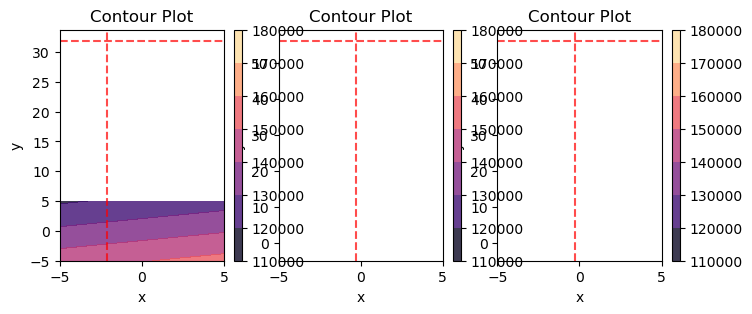

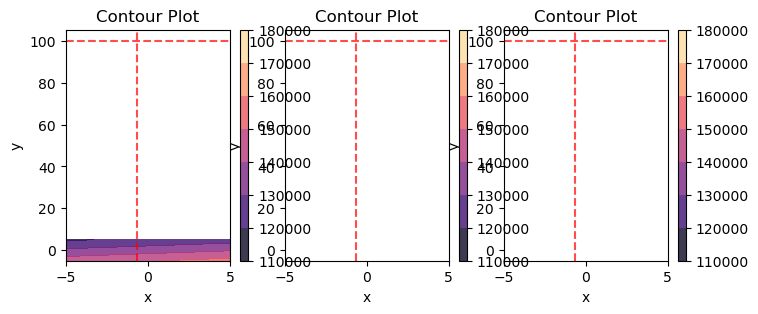

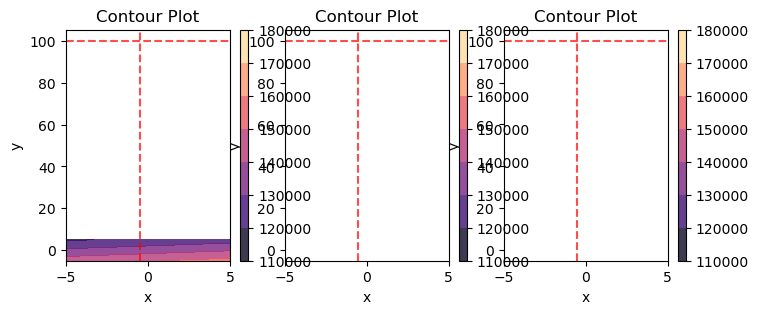

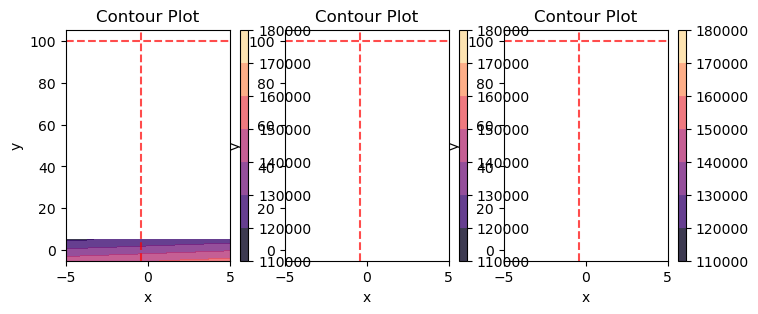

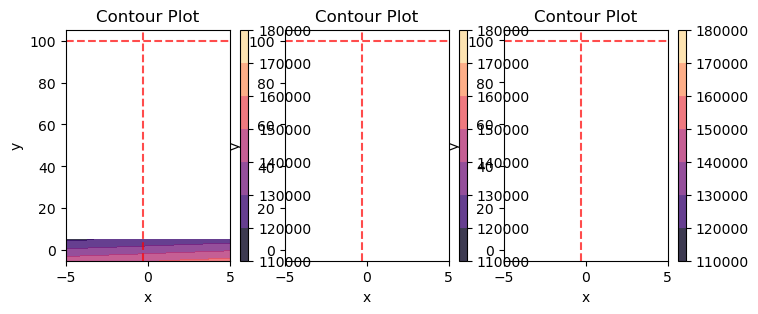

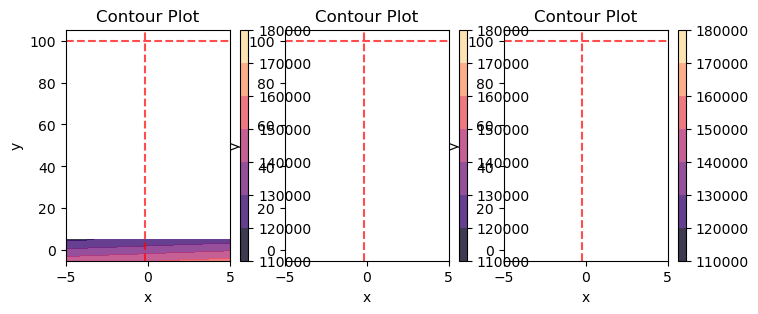

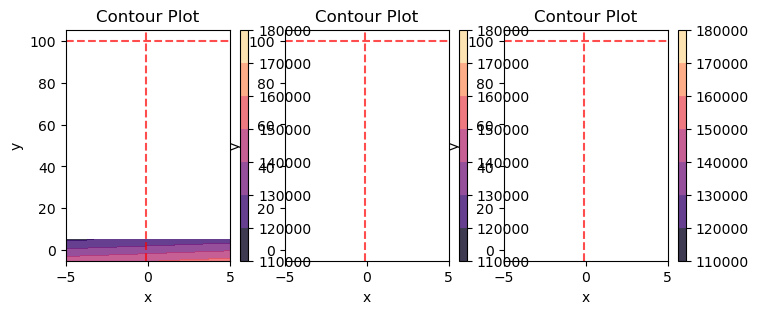

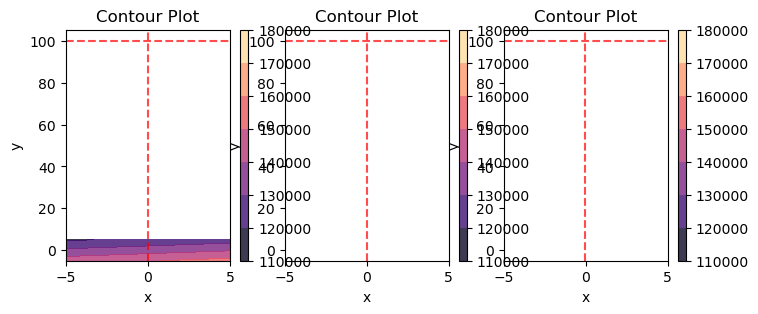

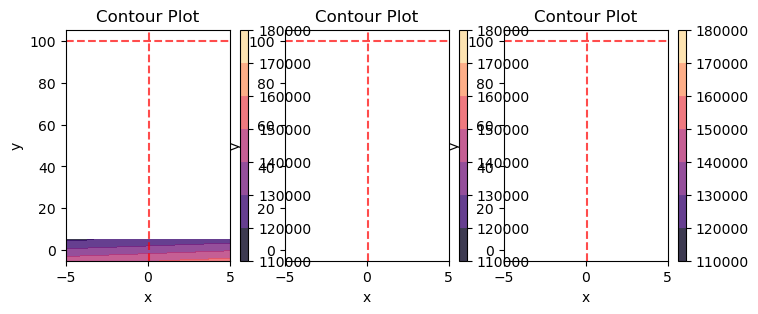

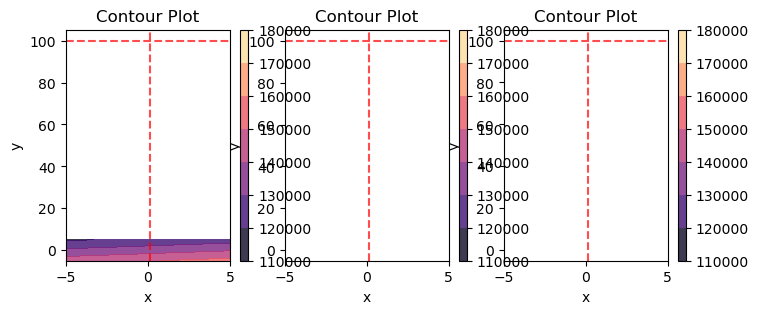

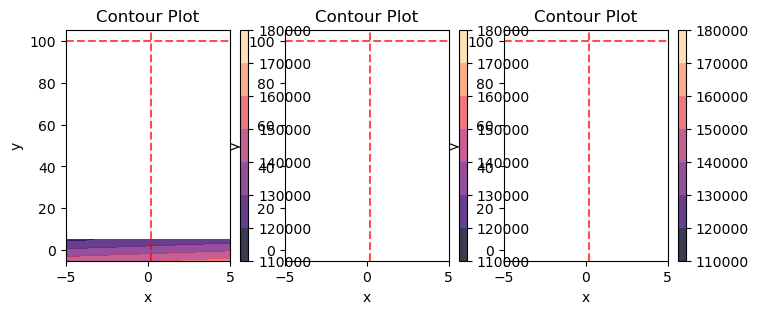

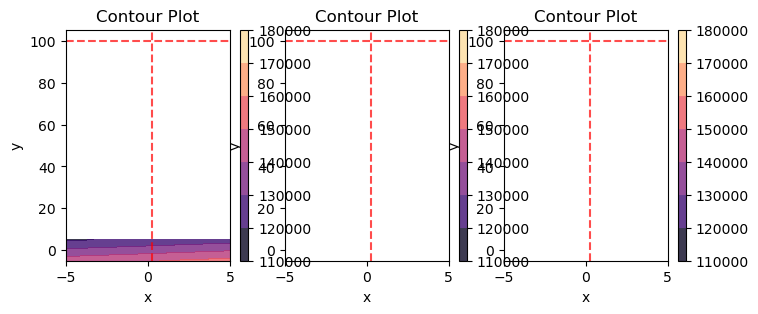

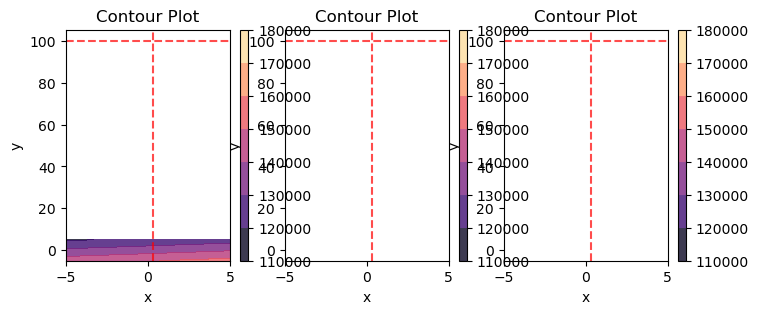

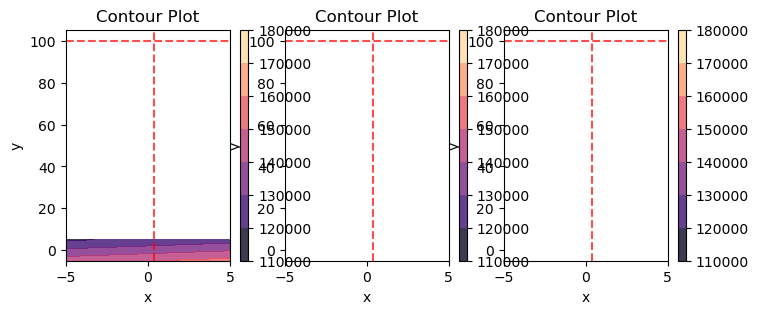

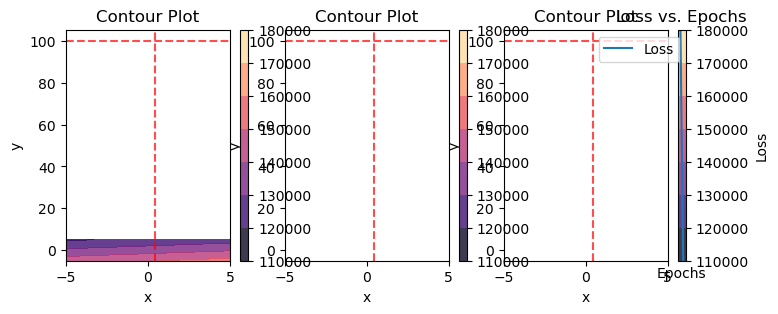

In [13]:

# Generate the dataset
x, y = generate_dataset_1()
X_ = x.reshape(-1, 1)
X__=np.ones(X_.shape[0])
X__=X__.reshape(-1,1)
X=np.hstack((X__,X_))
y=y.reshape(-1,1)
# Initialize weights randomly
np.random.seed(42)
theta =np.random.rand(X.shape[1])
theta=theta.reshape(-1,1)
# Set learning rate and epsilon
learning_rate = 0.001
epsilon = 0.001

# Placeholder for previous weights to check convergence
#prev_weights = weights.copy()

# Lists to store loss and iteration count
losses = []
iterations = []
# Start the iteration
iteration = 0
X1, Y1, Z1, X_torch, Y_torch = create_XYZ3(f1,X[0],y[0])
X2, Y2, Z2, X_torch, Y_torch = create_XYZ3(f2,X[1],y[1])
X3, Y3, Z3, X_torch, Y_torch = create_XYZ3(f3,X[2],y[2])
print(Z1)
levels = [110000,120000,130000,140000,150000,160000,170000,180000]
while True:
    # Randomly shuffle the dataset for stochasticity
    indices = np.random.permutation(X.shape[0])
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    # Initialize loss for this iteration
    current_loss = 0
    if iteration<15:
      fig, ax = plt.subplots(ncols=3, figsize=(8, 3))
    # Iterate through each data point
    for i in range(X.shape[0]):
        # Compute the gradient for the current data point
        gradient = 2 * (X_shuffled[i].reshape(1,-1) @ theta - y_shuffled[i].reshape(-1,1)) @ X_shuffled[i].reshape(1,-1)
        #print(gradient)
        # Update weights using the learning rate
        theta = theta - learning_rate * gradient.T
        # Update loss for this data point
        current_loss += (X_shuffled[i] @ theta - y_shuffled[i]) ** 2
        if iteration<15:
          if i<3:
            if i==0:
              _,_ = create_contour(X1, Y1, Z1, ax[i], alpha=0.8, scatter_pts=(theta[0],theta[1]), filled=True, levels=levels)
              ax[i].axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
              ax[i].axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)
            elif i==1:
              _, _ = create_contour(X2, Y2, Z2, ax[i], alpha=0.8, scatter_pts=(theta[0],theta[1]), filled=True, levels=levels)
              ax[i].axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
              ax[i].axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)
            else:
              _, _ = create_contour(X3, Y3, Z3, ax[i], alpha=0.8, scatter_pts=(theta[0],theta[1]), filled=True, levels=levels)
              ax[i].axhline(y=theta[1], color='red', linestyle='--', alpha=0.7)
              ax[i].axvline(x=theta[0], color='red', linestyle='--', alpha=0.7)
    # Calculate average loss for this iteration
    #current_loss /= X.shape[0]
    #print(current_loss)
    # Append loss and iteration count to the lists
    losses.append(current_loss)
    iterations.append(iteration)

    # Check for convergence using the L2 norm of the difference in weights
    if iteration!=0:
      if np.linalg.norm(current_loss - prev_loss) < epsilon :
          print(f"Converged at iteration {iteration + 1}")
          break

    # Update previous weights for the next iteration
    #prev_weights = weights.copy()
    prev_loss=current_loss
    iteration += 1




# Print the final weights
print("Final Weights:", theta)
# Plot Loss vs. Epochs
plt.plot(iterations, losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

The stochastic gradient descent (SGD) optimization algorithm, with a convergence threshold set at e_neighborhood (e=0.001), manifests divergent convergence behaviors across two distinct datasets. Specifically, SGD requires 261 epochs for convergence on dataset 1, while achieving the same for dataset 2 in merely 10 epochs. Conversely, vanilla gradient descent exhibits disparate convergence dynamics, demanding 132 epochs for dataset 1 and a substantially higher 481 epochs for dataset 2.

These findings suggest that the inherent dataset characteristics play a pivotal role in shaping the effectiveness of different optimization methodologies. The superior performance of SGD on dataset 2 implies a potential alignment between the algorithm's strengths, designed for handling noise and large datasets, and the inherent structure of dataset 2. Conversely, the consistent performance of vanilla gradient descent on dataset 1 indicates a compatibility between this dataset's properties and the traditional gradient descent approach, which computes the average gradient over the entire dataset in each iteration.

In summary, the selection of an optimization algorithm should depend upon the specific attributes of the dataset. The pronounced effectiveness of stochastic gradient descent on dataset 2, juxtaposed with the more stable performance of vanilla gradient descent on dataset 1, underscores the imperative to tailor optimization strategies to the unique characteristics of the dataset under consideration.